# 画像メディア工学３回目
## 3. トーンカーブを利用した画像の変換
### ライブラリの読み込み（おまじない）

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import cv2

### Google colaboratoryで利用する場合の画像のアップロード
Google colaboratoryでは，時間がたつと実行環境がリセットされるため，
その時には，画像ファイルのアップロードが必要．

In [2]:
from google.colab import files
uploaded_file = files.upload()

### 3.1 Pythonの配列の要素へのアクセス（スライス）
以下で利用する，Pythonでの配列の要素へのアクセスについて，簡単に紹介しておく．

Pythonでは，配列の一部分へのアクセスが容易にできる．

In [24]:
arr = "ABCDEFGHIJ"
print(arr[1])     # 1番目の要素
print(arr[0:3])   # 0番目～3未満(=2番目)まで
print(arr[:3])    # 先頭～2番目まで
print(arr[3:])    # 3番目～最後まで
print(arr[-2:])   # 最後から２番目～最後まで
print(arr[1:6:2]) # 1番目～5番目まで2つごと

B
ABC
ABC
DEFGHIJ
IJ
BDF


numpyの配列でも同じようにアクセスできる．

In [27]:
num = np.array([9,8,7,6,5,4,3,2,1,0])
print(num[1])
print(num[0:3])
print(num[:3])
print(num[3:])
print(num[-2:])
print(num[1:6:2])

8
[9 8 7]
[9 8 7]
[6 5 4 3 2 1 0]
[1 0]
[8 6 4]


スライスを利用して，配列の一部のみへの代入もできる

In [ ]:
num = np.array([9,8,7,6,5,4,3,2,1,0])
num[1:6:2]=0
print(num)

配列の添え字として，配列を利用できて，
$2\times3$の配列を配列の添え字とすると，結果も$2\times3$の配列になる．

In [28]:
idx = np.array([[0,1,2],
                [5,4,3]])
print( num[idx] )

[[9 8 7]
 [4 5 6]]


### 3.2 ガンマ変換

### 画像の読み込み

In [6]:
img = cv2.imread('img01.png', 0);  # モノクロ画像として読み込み
#plt.imshow(img, cmap='gray', vmin = 0, vmax = 255)

### トーンカーブ用の配列準備

In [30]:
in_val = np.array(range(256)) # 0～256未満(=255_)までの配列
#print(in_val)

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 24

### ガンマ変換のトーンカーブの作成とトーンカーブのグラフ描画
int_valは要素数256の配列なので，out_valも要素数256の配列になる．
$$out\_val = 255 * \frac{[0,1,2,...,254,255]}{255}^{\frac{1}{\gamma}}$$

out_val[10]は入力画素値が10の時に，出力画素値がいくらになるかを表す配列．

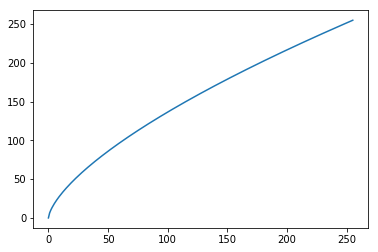

In [31]:
gamma = 1.5
out_val = 255 * (in_val/255)**(1/gamma) # ** はべき乗
#print(out_val)
plt.plot(in_val, out_val)

### ガンマ変換
まず，出力用の画像を作成．サイズは入力画像と同じ．

img.shapeは，画像（配列）の形状を返す

In [9]:
img2 = np.zeros(img.shape)
print(img.shape)

(624, 416)


for文を使って，画素ごとにガンマ変換を計算．

for i in range(5): は，for(i=0; i<5; i++){ と同じ意味．

for文の内部（繰り返し部分）はインデントで表されるため，Pythonではインデントが重要．

In [10]:
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        img2[i,j] = int( 255 * (img[i,j]/255)**(1/gamma) )    

ただし，for文を使って繰り返し計算すると時間がかかる．

3.1節で説明したように，配列の添え字として配列が利用できることを踏まえると，以下のように書ける（こちらの方が高速）

In [11]:
img2 = out_val[img] # 元画像をout_valの添え字として，元画像と同じサイズの配列が出力
img2 = img2.astype(np.uint8) # uint型に変換

### 変換結果を描画

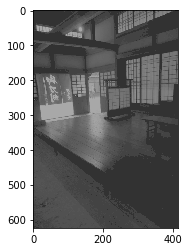

In [12]:
plt.imshow(img2, cmap='gray', vmin = 0, vmax = 255)

### 変換前後のヒストグラムの描画
変換前

(array([85078., 37444., 63230., 21002., 12923., 15366.,  9487.,  3195.,
         2043.,  2360.,  7456.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.]),
 array([  0. ,  10.2,  20.4,  30.6,  40.8,  51. ,  61.2,  71.4,  81.6,
         91.8, 102. , 112.2, 122.4, 132.6, 142.8, 153. , 163.2, 173.4,
        183.6, 193.8, 204. , 214.2, 224.4, 234.6, 244.8, 255. ]),
 <a list of 25 Patch objects>)

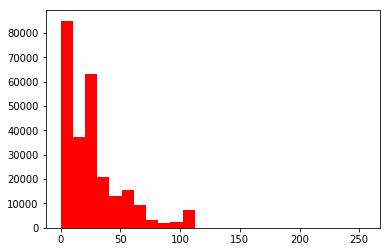

In [13]:
plt.hist(img.ravel(), color='red', bins=25,  range=(0, 255))

変換後　（最後にセミコロンを付けると，余計な出力を抑制できる）

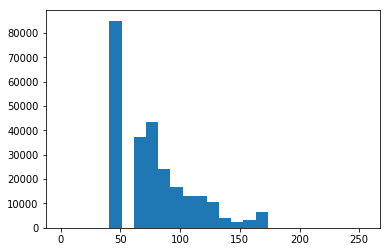

In [14]:
plt.hist(img2.ravel(), bins=25,  range=(0, 255));

### 3.3 折れ線トーンカーブ
トーンカーブを指定する配列out_valの値を折れ線トーンカーブ用に変更すると，折れ線トーンカーブによる変換も可能．

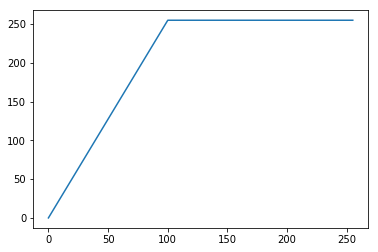

In [15]:
for i in range(256):
    if i<100:
        out_val[i] = np.array(i)/100*255
    else:
        out_val[i] = 255

plt.plot(in_val, out_val)                

スライスを利用してfor文などの繰り返しを使わずにout_valを定義し，
その処理を提出してください．

結果は上のグラフと同じになります．

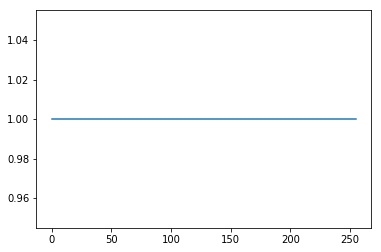

In [16]:
out_val[0] = 1
out_val[1] = 2

plt.plot(in_val, out_val)                